In [1]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing import image

Samples Training Set: 6999
Samples in Validation Data: 1500
Samples in Test Data: 1500
Batch size: 8
Epoch 1/10
875/875 [==============================] - 38s 36ms/step - loss: 0.4582 - precision: 0.4957 - recall: 0.1807 - binary_accuracy: 0.8169 - val_loss: 0.3773 - val_precision: 0.5928 - val_recall: 0.3301 - val_binary_accuracy: 0.8280
Epoch 2/10
875/875 [==============================] - 33s 38ms/step - loss: 0.3637 - precision: 0.6364 - recall: 0.2666 - binary_accuracy: 0.8384 - val_loss: 0.3558 - val_precision: 0.6839 - val_recall: 0.2876 - val_binary_accuracy: 0.8378
Epoch 3/10
875/875 [==============================] - 35s 40ms/step - loss: 0.3480 - precision: 0.6685 - recall: 0.3051 - binary_accuracy: 0.8456 - val_loss: 0.3556 - val_precision: 0.6519 - val_recall: 0.3953 - val_binary_accuracy: 0.8435
Epoch 4/10
875/875 [==============================] - 35s 40ms/step - loss: 0.3414 - precision: 0.6864 - recall: 0.3230 - binary_accuracy: 0.8495 - val_loss: 0.3476 - val_precisio

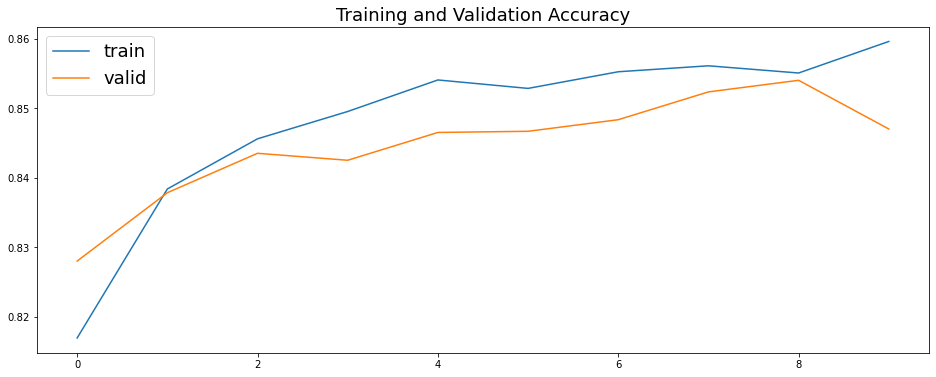

INFO:tensorflow:Assets written to: cnn8_checkpoints/iter1\assets
Model 1evaluating:
47/47 [==============================] - 2s 39ms/step - loss: 0.3347 - precision: 0.6359 - recall: 0.4735 - binary_accuracy: 0.8470
model loaded: iter1
training model 2
Samples Training Set: 6999
Samples in Validation Data: 1500
Samples in Test Data: 1500
Batch size: 8
SGD
Epoch 1/10
875/875 [==============================] - 31s 34ms/step - loss: 0.3108 - precision: 0.7146 - recall: 0.4081 - binary_accuracy: 0.8618 - val_loss: 0.3198 - val_precision: 0.6351 - val_recall: 0.4857 - val_binary_accuracy: 0.8612
Epoch 2/10
875/875 [==============================] - 32s 37ms/step - loss: 0.3053 - precision: 0.7245 - recall: 0.4182 - binary_accuracy: 0.8644 - val_loss: 0.3094 - val_precision: 0.6699 - val_recall: 0.4657 - val_binary_accuracy: 0.8663
Epoch 3/10
875/875 [==============================] - 32s 36ms/step - loss: 0.3031 - precision: 0.7254 - recall: 0.4249 - binary_accuracy: 0.8653 - val_loss: 0.31

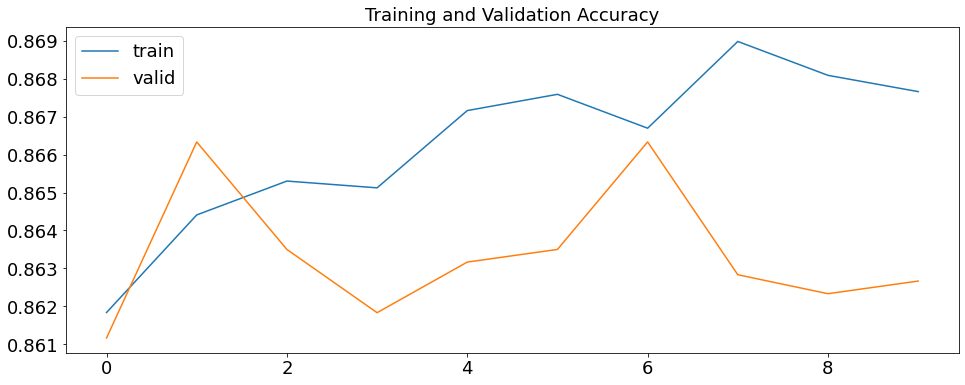

INFO:tensorflow:Assets written to: cnn8_checkpoints/iter2\assets
Model 2evaluating:
47/47 [==============================] - 2s 34ms/step - loss: 0.3142 - precision: 0.6378 - recall: 0.4981 - binary_accuracy: 0.8627
model loaded: iter2
training model 3
Samples Training Set: 6999
Samples in Validation Data: 1500
Samples in Test Data: 1500
Batch size: 8
SGD
Epoch 1/10
875/875 [==============================] - 32s 35ms/step - loss: 0.2986 - precision: 0.7297 - recall: 0.4441 - binary_accuracy: 0.8664 - val_loss: 0.3114 - val_precision: 0.7037 - val_recall: 0.5345 - val_binary_accuracy: 0.8717
Epoch 2/10
362/875 [===========>..................] - ETA: 19s - loss: 0.2924 - precision: 0.7222 - recall: 0.4483 - binary_accuracy: 0.8688

KeyboardInterrupt: 

In [4]:
attr_data_path = "list_attr_celeba.csv"
images_data_path = "C:/Users/foreh/Documents/celebaRepo/FacialAttrCNN/celeba/greyscale"
images_data_size = 10000 

tf.keras.backend.clear_session()
width = 178
height = 218
x_ = 100                            # new value of x
image_size_ratio = width / height    # dimensions ratio
y_ = int(image_size_ratio * x_)  
model = Sequential()
model.add(tf.keras.Input(shape=(height, width,1)))
model.add(tf.keras.layers.Normalization())

model.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same'))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same'))
model.add(tf.keras.layers.Normalization())

model.add(Conv2D(filters=4, kernel_size=(3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same'))
model.add(Conv2D(filters=8,kernel_size=(2,2),padding = 'same'))
model.add(tf.keras.layers.Normalization())

model.add(Conv2D(filters=4, kernel_size=(3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same'))
model.add(Conv2D(filters=8,kernel_size=(2,2),padding = 'same'))
## changed from (3,3)->(1,3)
model.add(tf.keras.layers.Normalization())

model.add(Conv2D(filters=4, kernel_size=(3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=4))

model.add(Conv2D(filters=16, kernel_size=(3,3)))
model.add(Conv2D(filters=16, kernel_size=(2,2)))
model.add(tf.keras.layers.AveragePooling2D(pool_size=2))

model.add(tf.keras.layers.Normalization())

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(48))
model.add(Dense(16))
model.add(Dense(4, activation='sigmoid'))
original_image_size = (width,height)
df_org = pd.read_csv(attr_data_path)

for i in range(1, 100):
    if (i > 1):
        model = tf.keras.models.load_model('cnn8_checkpoints/iter'+str(i-1))
        print("model loaded: iter"+str(i-1))
        print("training model "+str(i))
    df = pd.DataFrame()
    if((i+1) % 20 == 0):
        df = df_org[(1+images_data_size*(i%20)):202600]
    else:
        df = df_org[(1+images_data_size*(i%20)):images_data_size*((i+1)%20)]
    df = df.replace(-1,0)
    #print(df.head(5))
    images_data = list()
    for idx in range(df.shape[0]):
        path = "{}/{}".format(str(images_data_path),str(df.iloc[idx].image_id))
        image = PIL.Image.open(path)
        image_array = np.asarray(image)
        images_data.append(image_array)
    images_data = np.array(images_data)
    def image_from_index(index, size=(original_image_size), path=images_data_path):
        path = "{}/{}".format(str(path),str(df.iloc[index].image_id))
        # to read the image
        image = PIL.Image.open(path).resize(size)
        image_array = np.asarray(image)

        return image_array
    images = images_data # list of array of images
    labels = df[["image_id", "Bangs", "Straight_Hair", "Wavy_Hair", "Wearing_Hat"]]  # dataframe of image features
    train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.3,random_state=(i%6))
    y_test=test_labels.drop(["image_id"],axis=1)
    y_train=train_labels.drop(["image_id"],axis=1)

    X_test=test_images
    X_train=train_images
    #X_train = tf.expand_dims(X_train, axis=-1)
    print("Samples Training Set:",len(X_train))
    X_test, X_val, y_test, y_val=train_test_split(X_test, y_test,test_size=0.5,random_state=(i%5))
    print("Samples in Validation Data:",len(X_val))
    print("Samples in Test Data:",len(X_test))
    x_ = original_image_size[0]
    y_ = original_image_size[1]
    BATCH_SIZE = (8)
    print("Batch size: " + str(BATCH_SIZE))
    if False or i%3 == 1:
          model.compile(optimizer = "nadam",loss="binary_crossentropy",metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'binary_accuracy'])
    elif True or i%3 == 2 or i%3 == 0:
          print("SGD")
          opt = tf.keras.optimizers.SGD(learning_rate=0.001)
          model.compile(optimizer = opt,loss="binary_crossentropy",metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'binary_accuracy'])
    else:
          print("ADAM")
          opt = tf.keras.optimizers.Adam(learning_rate=0.003)
          model.compile(optimizer = opt,loss="binary_crossentropy",metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'binary_accuracy'])
    hist = model.fit(X_train,y_train,epochs = 10,validation_data = (X_val,y_val),batch_size=BATCH_SIZE,shuffle = True)
    plt.figure(figsize=(16, 6))
    plt.plot(hist.history['binary_accuracy'], label = 'train')
    plt.plot(hist.history['val_binary_accuracy'], label = 'valid')
    plt.rcParams['ytick.labelsize']=18
    plt.rcParams['xtick.labelsize']=18
    plt.rcParams['axes.labelsize']=18
    plt.legend(fontsize=18)
    plt.title('Training and Validation Accuracy', fontsize=18)
    plt.savefig('accuracy')
    plt.show() 
    model.save('cnn8_checkpoints/iter'+str(i))
    print("Model " + str(i) +"evaluating:")
    model.evaluate(X_val,y_val)
    tf.keras.backend.clear_session()

In [3]:
attr_data_path = "list_attr_celeba.csv"
images_data_path = "C:/Users/foreh/Documents/celeba/greyscale"

tf.keras.backend.clear_session()
width = 178
height = 218
df_org = pd.read_csv(attr_data_path)

df = df_org[190000:202600]
df = df.replace(-1,0)
#print(df.head(5))
images_data = list()
for idx in range(df.shape[0]):
    path = "{}/{}".format(str(images_data_path),str(df.iloc[idx].image_id))
    image = PIL.Image.open(path)
    image_array = np.asarray(image)
    images_data.append(image_array)
images_data = np.array(images_data)
def image_from_index(index, size=(width,height), path=images_data_path):
    path = "{}/{}".format(str(path),str(df.iloc[index].image_id))
    # to read the image
    image = PIL.Image.open(path).resize(size)
    image_array = np.asarray(image)

    return image_array
images = images_data # list of array of images
labels = df[["image_id", "Bangs", "Straight_Hair", "Wavy_Hair", "Wearing_Hat"]]  # dataframe of image features
labels=labels.drop(["image_id"],axis=1)



In [4]:
for i in range(1, 40):
    tf.keras.backend.clear_session()
    print("###### EVAL MODEL "+str(i)+"######")
    model1 = tf.keras.models.load_model('cnn8_checkpoints/iter'+str(i))
    model1.evaluate(images,labels)

###### EVAL MODEL 1######
394/394 [==============================] - 14s 30ms/step - loss: 0.3880 - precision_3: 0.5515 - recall_3: 0.5731 - binary_accuracy: 0.8283
###### EVAL MODEL 2######
394/394 [==============================] - 12s 30ms/step - loss: 0.3325 - precision_4: 0.6671 - recall_4: 0.4531 - binary_accuracy: 0.8514
###### EVAL MODEL 3######
394/394 [==============================] - 12s 30ms/step - loss: 0.3264 - precision_5: 0.7254 - recall_5: 0.4275 - binary_accuracy: 0.8588
###### EVAL MODEL 4######
394/394 [==============================] - 12s 30ms/step - loss: 0.3864 - precision_6: 0.6459 - recall_6: 0.3524 - binary_accuracy: 0.8383
###### EVAL MODEL 5######
394/394 [==============================] - 12s 30ms/step - loss: 0.3247 - precision_7: 0.6907 - recall_7: 0.4842 - binary_accuracy: 0.8591
###### EVAL MODEL 6######
394/394 [==============================] - 12s 30ms/step - loss: 0.3117 - precision_8: 0.7387 - recall_8: 0.4521 - binary_accuracy: 0.8639
###### EVA